In [1]:
### ANALIZER per 4PARK

In [11]:
# Configuro le variabili d'ambiente
#

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import ai4res.vision as a4v


BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE

DATA_FORLDER_TRN = "./data/4Park/train/"
DATA_FORLDER_TST = "./data/4Park/test/"

TF_MODEL_PARAMS = "./4part-ext.h5"

In [12]:
# Valutiamo il modello su un test set separato
test_ds = a4v.load_ds(DATA_FORLDER_TST)
class_names = test_ds.class_names #type: ignore
print(f'Test  DS size {len(test_ds.file_paths)}')


model = tf.keras.models.load_model(TF_MODEL_PARAMS)
score = model.evaluate(test_ds)

print(score)

Found 2000 files belonging to 2 classes.
Test  DS size 2000
 3/63 [>.............................] - ETA: 1s - loss: 0.0169 - accuracy: 0.9896 

2023-04-04 11:06:41.196703: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 2s 26ms/step - loss: 0.0259 - accuracy: 0.9895
[0.025879811495542526, 0.9894999861717224]


In [13]:
# analisi degli eventuali errori di classificazione, visualizzazione delle immagini mal classificate
import os
import sys

control_ds = test_ds

cntrl_imgs = []
cntrl_lbls = []
pred_lbls = []

orig_stdout = sys.stdout

with open(os.devnull, 'w') as devnull:
    sys.stdout = devnull
    for batch_imgs, batch_lbls in control_ds:
        batch_pred = model.predict(batch_imgs)
        batch_pred_lbls = np.argmax(batch_pred, axis=1)

        cntrl_imgs.extend(batch_imgs.numpy())
        cntrl_lbls.extend(batch_lbls.numpy())
        pred_lbls.extend(batch_pred_lbls)

sys.stdout = orig_stdout

cntrl_imgs = np.array(cntrl_imgs)
cntrl_lbls = np.array(cntrl_lbls).squeeze()
pred_lbls = np.array(pred_lbls)

incorrect_indxes = np.nonzero(pred_lbls != cntrl_lbls)[0]
n_imgs = len(incorrect_indxes)

print(f'Errori nel control set {n_imgs} su {len(cntrl_lbls)}')

2023-04-04 11:06:44.363857: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Errori nel control set 21 su 2000


2023-04-04 11:06:48.408204: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


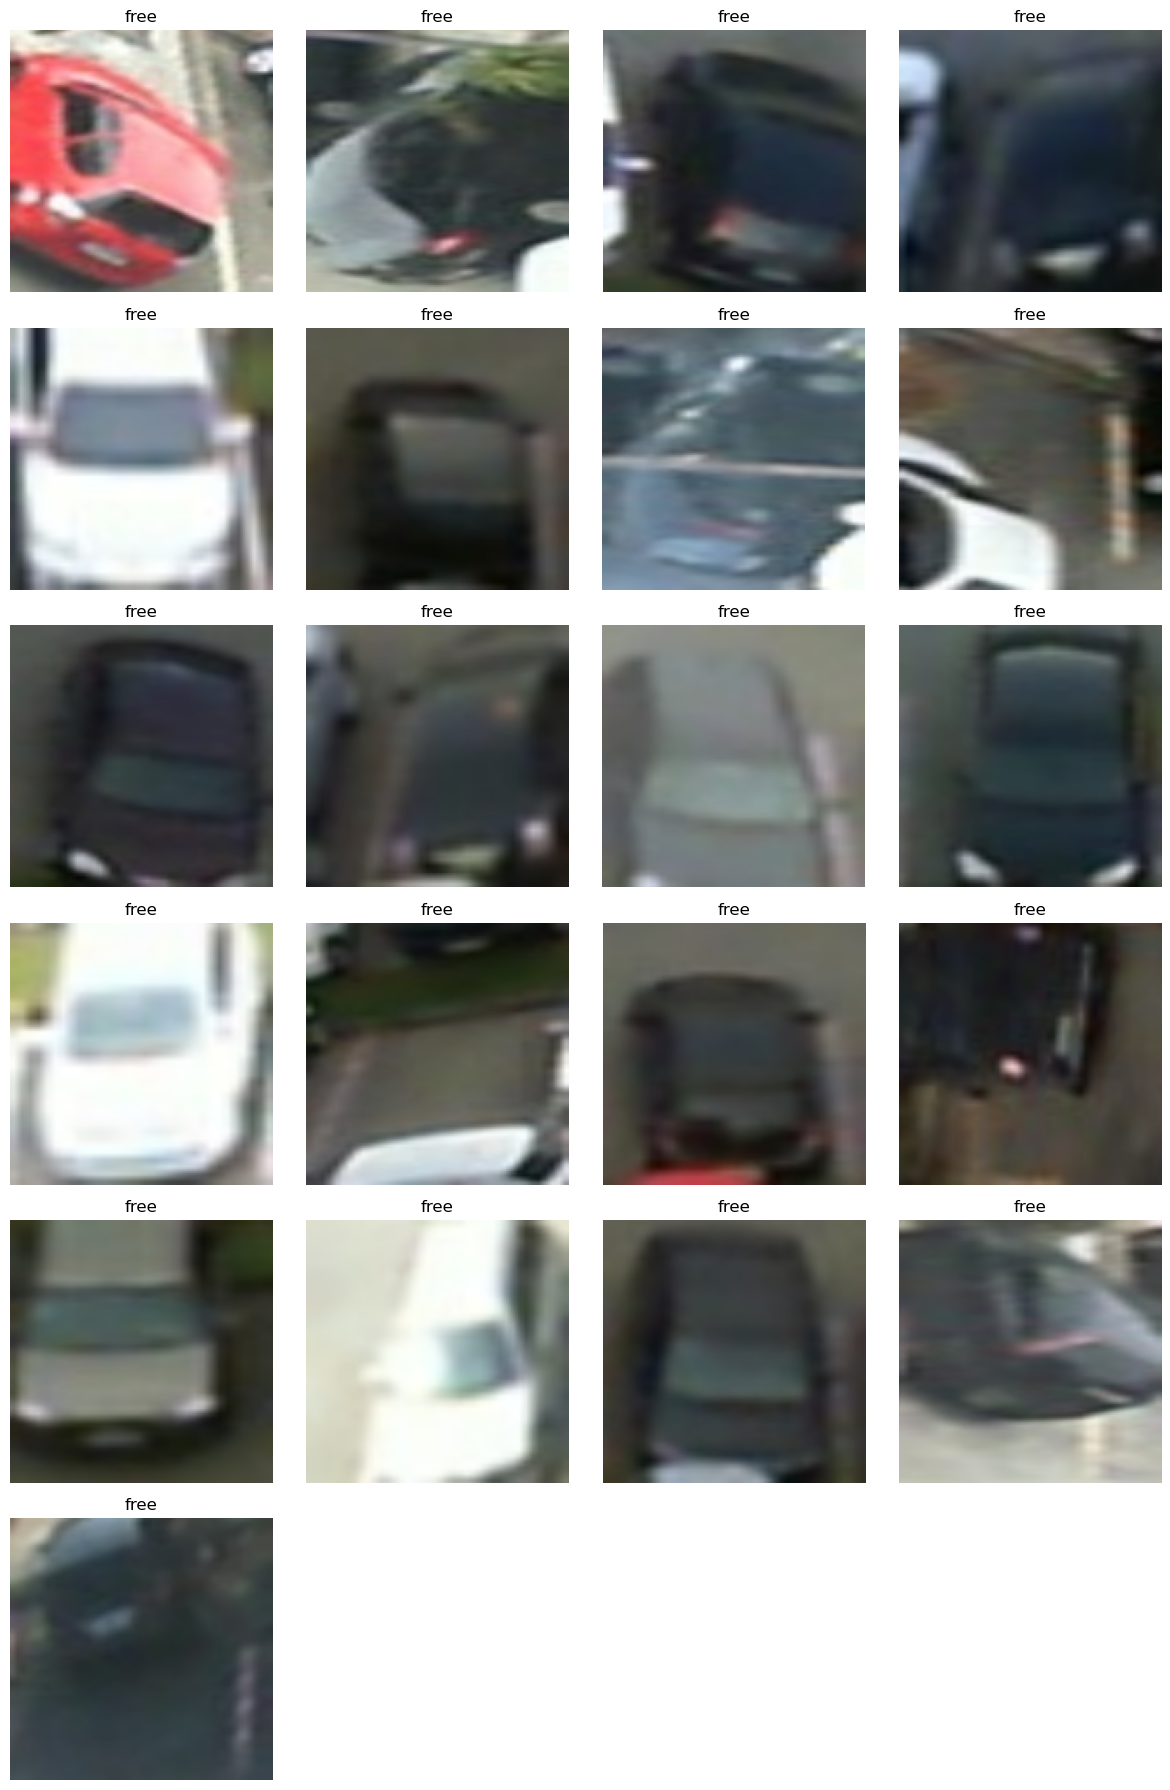

In [14]:
# Plot dei mismatch

if n_imgs > 40:
    n_imgs = 40
    
n_col = 4
n_row = n_imgs // n_col + int(n_imgs % n_col > 0)

plt.figure(figsize=(3*n_col, 3*n_row))

for i, idx in enumerate(incorrect_indxes):
    plt.subplot(n_row, n_col, i+1)
    plt.imshow(cntrl_imgs[idx].astype('uint8'))
    plt.title(class_names[pred_lbls[idx]])
    plt.axis('off')

plt.tight_layout()
plt.show()